In [38]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

In [39]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [40]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Null: waterfront, view, yr_renovated

In [41]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
house_df['date'].max(), house_df['date'].min()

('9/9/2014', '1/10/2015')

In [43]:
house_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [44]:
house_df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [45]:
house_df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [46]:
house_df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [47]:
house_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [48]:
house_df[house_df['yr_renovated'].isna() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,NO,NONE,...,7 Average,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,NO,NONE,...,8 Good,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,NO,NONE,...,7 Average,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,NO,NONE,...,8 Good,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,NO,AVERAGE,...,10 Very Good,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,NO,NONE,...,8 Good,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,NO,NONE,...,10 Very Good,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


## clean up the data:

In [49]:
house_df['yr_sold'] = house_df['date'].str[-4:].astype('int64')
house_df['house_age'] = house_df['yr_sold'] - house_df['yr_built']
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,house_age
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


In [50]:
condition = (
    (house_df['yr_renovated']==0) |
    (house_df['yr_renovated'].isna())
    )
house_df['renovated'] = np.where(condition, 0, 1)

In [51]:
house_df['grade'] = house_df['grade'].str.strip(string.ascii_letters+string.whitespace).astype('int64')

In [52]:
drop_columns = ['date', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
house_df.drop(drop_columns, axis=1, inplace=True)

In [53]:
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yr_sold,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7,98178,2014,59,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7,98125,2014,63,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6,98028,2015,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7,98136,2014,49,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8,98074,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8,98103,2014,5,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8,98146,2015,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7,98144,2014,5,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8,98027,2015,11,0


initial model:

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
initial_df = house_df[['price', 'sqft_living', 'house_age', 'renovated']]
initial_df

,price,sqft_living,house_age,renovated
0,221900.0,1180,59,0
1,538000.0,2570,63,1
2,180000.0,770,82,0
3,604000.0,1960,49,0
4,510000.0,1680,28,0
...,...,...,...,...
21592,360000.0,1530,5,0
21593,400000.0,2310,1,0
21594,402101.0,1020,5,0
21595,400000.0,1600,11,0


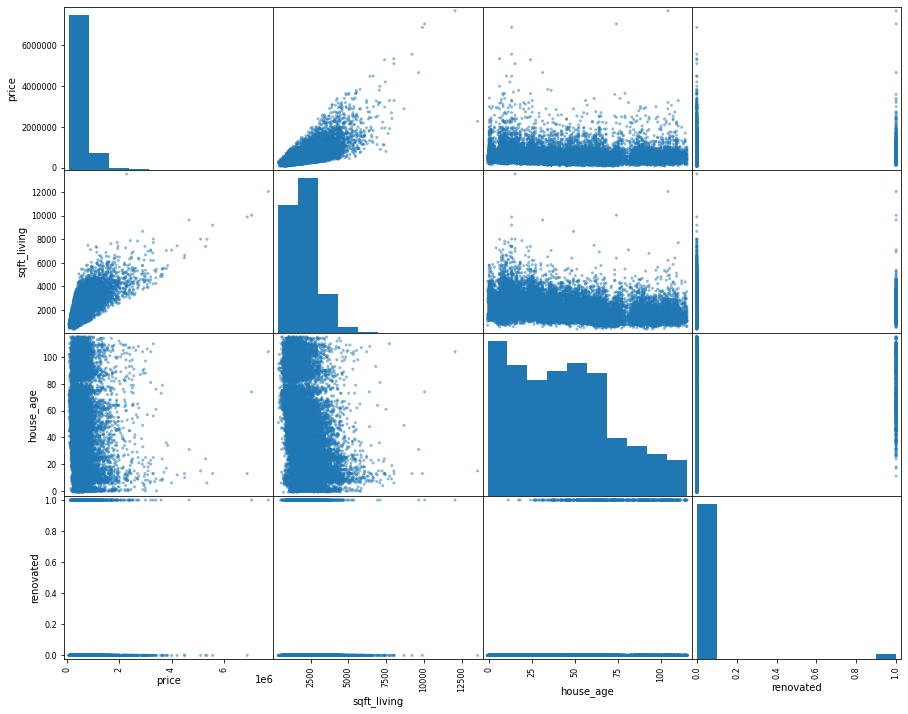

In [56]:
pd.plotting.scatter_matrix(initial_df, figsize=(15,12));

as a baseline, first regression model will just use `sqft_living` as it appears to be the most promising

In [57]:
X = initial_df.drop(['price', 'house_age', 'renovated'], axis=1)
y = initial_df['price']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25)

In [58]:
init_model = LinearRegression()
init_model.fit(X_train, y_train)
init_model.score(X_test, y_test)

0.4741774315147914

not a great correlation coefficient. lets try to standardize/normalize first:

<ipython-input-59-81cce47a18c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['log_sqft_living'] = np.log(X_train['sqft_living'])


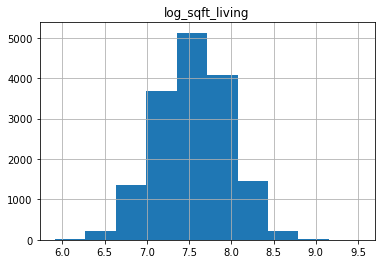

In [59]:
X_train['log_sqft_living'] = np.log(X_train['sqft_living'])
X_train.hist('log_sqft_living');

In [60]:
s

In [61]:
# ln = 'log-norm'
X_train['ln_sqft_living'] = normalize(X_train['log_sqft_living'])

<ipython-input-61-080f10a2fe87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ln_sqft_living'] = normalize(X_train['log_sqft_living'])


In [62]:
X_train.drop(['sqft_living', 'log_sqft_living'], axis=1, inplace=True)

C:\Users\diper\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([[<AxesSubplot:title={'center':'ln_sqft_living'}>]], dtype=object)

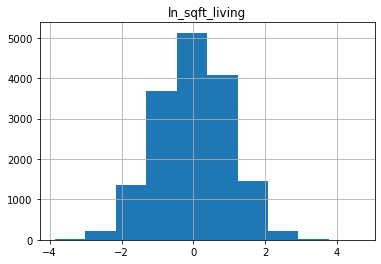

In [63]:
X_train.hist()

In [64]:
X_test['log_sqft_living'] = np.log(X_test['sqft_living'])
X_test['ln_sqft_living'] = normalize(X_test['log_sqft_living'])
X_test.drop(['sqft_living', 'log_sqft_living'], axis=1, inplace=True)

<ipython-input-64-0cb041616586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['log_sqft_living'] = np.log(X_test['sqft_living'])
<ipython-input-64-0cb041616586>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ln_sqft_living'] = normalize(X_test['log_sqft_living'])


In [65]:
ln_init_model = LinearRegression()
ln_init_model.fit(X_train, y_train)
ln_init_model.score(X_test, y_test)

0.3759422981996027

it got worse???

## this time just prep the whole data set

In [66]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   view         21534 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
 12  yr_sold      21597 non-null  int64  
 13  house_age    21597 non-null  int64  
 14  renovated    21597 non-null  int32  
dtypes: float64(3), int32(1), int64(8), object(3)
memory usage: 2.4+ MB


In [67]:
house_df['waterfront'].fillna('NO', inplace=True)
house_df['view'].fillna('NONE', inplace=True)

In [68]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   view         21597 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
 12  yr_sold      21597 non-null  int64  
 13  house_age    21597 non-null  int64  
 14  renovated    21597 non-null  int32  
dtypes: float64(3), int32(1), int64(8), object(3)
memory usage: 2.4+ MB


In [69]:
house_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,yr_sold,house_age,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7,98178,2014,59,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7,98125,2014,63,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6,98028,2015,82,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7,98136,2014,49,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8,98074,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8,98103,2014,5,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8,98146,2015,1,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7,98144,2014,5,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8,98027,2015,11,0


In [70]:
# conts = ['sqft_living', 'house_age']
# house_df[conts] = np.log(house_df[conts])

In [71]:
# cats = house_df[['waterfront', 'renovated', 'view', 'condition', 'grade']]

# scaler = StandardScaler()

# ohe = OneHotEncoder()

# view_oe = OrdinalEncoder(categories=[['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']])
# condition_oe = OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good']])
# grade_oe = OrdinalEncoder(categories=[[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]])

# column_transform = make_column_transformer(
#     (ohe, ['waterfront', 'renovated']),
#     (view_oe, ['view']),
#     (condition_oe, ['condition']),
#     (grade_oe, ['grade']),
#     (scaler, [conts])
#     )

In [72]:
# X = house_df.drop(['id', 'price', 'zipcode', 'sqft_lot', 'yr_sold', 'bedrooms', 'bathrooms', 'floors'], axis=1)
# y = house_df['price']
# X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=42)

# lr= LinearRegression()
# lr_pipe = make_pipeline(column_transform, scaler, lr)

In [73]:
# lr_pipe.fit(X_train, y_train)
# lr_predictions = lr_pipe.predict(X_test)

In [74]:
# lr_pipe.score(X_test, y_test)